## By Sbai Aymane
### Network Data Visualization 

First step would be to install the networkx python package that will help us read and mainuplate the network data

In [2]:
# pip install networkx

In [1]:
import networkx as nx
from scipy.io import mmread
import matplotlib.pyplot as plt

In [2]:
G = mmread('econ-poli-large.mtx')
NetD = nx.Graph(G)
print(NetD)

Graph with 15575 nodes and 33043 edges


In [3]:
#list(NetD.edges)
#list(NetD.nodes)

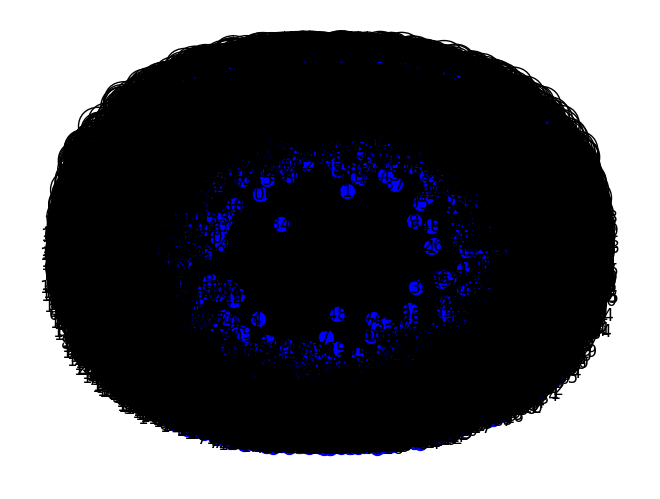

In [4]:
nx.draw(NetD, with_labels=True, node_color='blue', node_size=100)
plt.show()

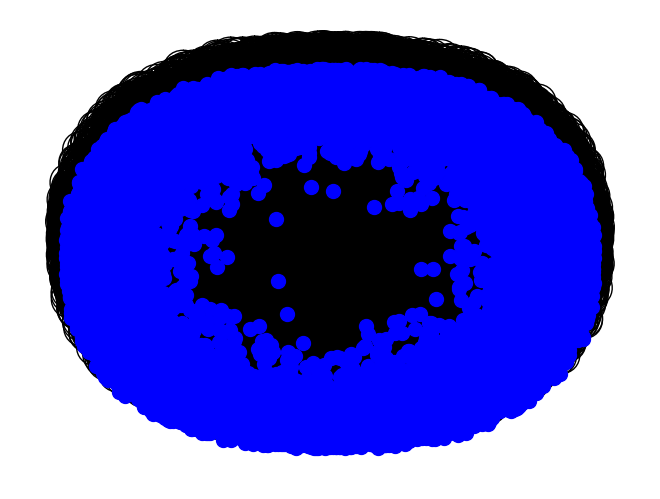

In [5]:
pos = nx.spring_layout(NetD)

nx.draw(NetD, pos=pos, with_labels=False, node_color='blue', node_size=100)
plt.show()